60000 10000
Actual images


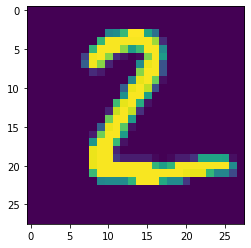

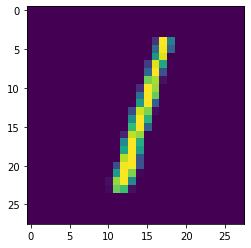

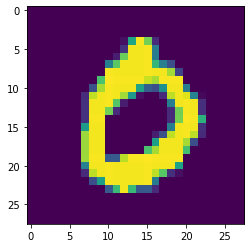

In [37]:
# handwritten task with conv neural network
# basically conv network is process to discard unwanted piece of pixel. work with compress pixel without damaging its utility
# two parts with conv network 
# 1. filter matrix => which convert the existing matrix to horizontal and verical transformation 
# 2. pooling : take element from the matrix .. for example 64 element split to 4 , 4 * 4 matrix & take max from each matrix . then 64 elements reduced to 4 elements

import tensorflow as tf 
import numpy as np 
from os import path,getcwd,chdir

#data 
path = f"{getcwd()}/../data/mnist.npz"
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data(path = path)

#normalize data 
(x_train,x_test) = (x_train/255.0,x_test/255.0)

print(len(x_train),len(x_test))

FirstImage =  1
SecondImage =  2
ThirdImage = 3
CON_NUM = 1

print ("Actual images")
plt.imshow(x_test[FirstImage])
plt.figure()
plt.imshow(x_test[SecondImage])
plt.figure()
plt.imshow(x_test[ThirdImage])


In [4]:
#Abstract Neural network 
# result may be better than cnn for small data sets but in long run it will be a issue

model =tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

history =  model.fit(x_train,y_train,epochs=5)

print(history.epoch, history.history['accuracy'][-1])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2040 - accuracy: 0.9400
Epoch 2/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0811 - accuracy: 0.9752
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0522 - accuracy: 0.9837
Epoch 4/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0372 - accuracy: 0.9885
Epoch 5/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0267 - accuracy: 0.9919
[0, 1, 2, 3, 4] 0.9919


In [29]:
x_train = (x_train.reshape(60000,28,28,1))
x_test.reshape(10000,28,28,1))
model =tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model.summary()
model.fit(x_train,y_train,epochs=5)

#print(history.epoch, history.history['accuracy'][-1])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

In [30]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 247us/sample - loss: 0.0352 - accuracy: 0.9893


[0.03517043954282999, 0.9893]

In [21]:
#visualization 
print (y_test[:10])

[7 2 1 0 4 1 4 9 5 9]


Convolution steps


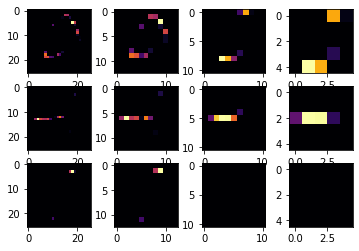

In [41]:
import matplotlib.pyplot as plt 
f,axarr = plt.subplots(3,4)
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input , outputs = layer_outputs )

print ("Convolution steps")
for x in range(0,4) :
    f1 = activation_model.predict(x_train[FirstImage].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, : , : , CON_NUM],cmap = 'inferno')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(x_train[SecondImage].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, : , : , CON_NUM],cmap = 'inferno')
    axarr[1,x].grid(False)
   
    f3 = activation_model.predict(x_train[ThirdImage].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, : , : , CON_NUM],cmap = 'inferno')
    axarr[2,x].grid(False)